In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

In [2]:
# read in the iris data which is included with sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# It's a 'bunch', kind of like a dictionary.
print(type(iris))
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# what are the data and target?
print(iris.data[:5])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [5]:
# convert these values into a dataframe, calculate area, and display.
df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['species']=iris.target
df['sepal_area']=df.apply(lambda x: x['sl']*x['sw'], axis=1)
df['petal_area']=df.apply(lambda x: x['pl']*x['pw'], axis=1)
df.head()

,sl,sw,pl,pw,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28


In [6]:
# How many do we have of each species?
df['species'].value_counts().sort_index()

0    50
1    50
2    50
Name: species, dtype: int64

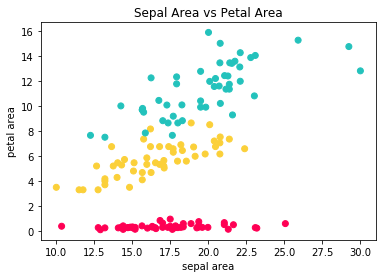

In [7]:
# plot the flowers' sepal area vs sepal area using matplotlib
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(df['sepal_area'], df['petal_area'], c=colors[df['species']])
plt.xlabel('sepal area')
plt.ylabel('petal area')
plt.title('Sepal Area vs Petal Area')
plt.show()

### K-Nearest Neighbors with area included

In [8]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['species']=iris.target

# establish the predictors and the target
X = df.drop(['species'], axis=1)
y = df['species']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                         test_size=0.3, random_state=52 )
# instantiate the estimator
mymodel = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
# fit with training data
mymodel.fit(X_train, y_train)
# predict on the testing data
y_preds = mymodel.predict(X_test)
# evaluate the accuracy score
print(metrics.accuracy_score(y_test, y_preds))
# evaluate other scores
print(metrics.confusion_matrix(y_test, y_preds))

0.9333333333333333
[[11  0  0]
 [ 0 14  3]
 [ 0  0 17]]


In [9]:
counter=10
print(len(X_test.iloc[counter]))
print(X_test.iloc[counter].values)
print(y_test.iloc[counter])

4
[6.7 3.3 5.7 2.1]
2


In [10]:
mymodel.predict([X_train.iloc[counter]])

array([1])

In [11]:
mymodel.predict([X_train.iloc[counter].values])[0]

1

In [12]:
print(type(X_test.iloc[counter].values))
print(type([X_test.iloc[counter].values]))

<class 'numpy.ndarray'>
<class 'list'>


#### New observation

In [13]:
# Create a  fake new data point
new_observation0=[[6,3,5,2]]
print(new_observation0[0][0])

6


In [14]:
# calculate sepal & petal area for the predicted value
nobs_sepal_a=[new_observation0[0][0]*new_observation0[0][1]]
nobs_petal_a=[new_observation0[0][2]*new_observation0[0][3]]
print(new_observation0[0][3])
print(nobs_sepal_a)

2
[18]


In [15]:
# predict for our new observations.
prediction=mymodel.predict(new_observation0)
print(prediction)

[2]


In [16]:
# what are the species names associated with those predictions?
print(iris.target_names[1])

versicolor


In [17]:
# What's the distance and the ID numbers of the 5 nearest neighbors?
print(mymodel.kneighbors(new_observation0)) 
print('distances:', mymodel.kneighbors(new_observation0)[0][0]) 
print('indices:', mymodel.kneighbors(new_observation0)[1][0]) 

(array([[0.24494897, 0.24494897, 0.28284271, 0.38729833, 0.38729833]]), array([[20, 42, 31, 49, 81]]))
distances: [0.24494897 0.24494897 0.28284271 0.38729833 0.38729833]
indices: [20 42 31 49 81]


In [18]:
# convert the list of neighbors into a list, for visualization purposes.
neighbors=list(mymodel.kneighbors(new_observation0)[1][0])
print(neighbors)

[20, 42, 31, 49, 81]


In [20]:
# Add species back in, calculate area, then reset the index.
X_train['species']=y_train.copy()
X_train.reset_index(drop=False, inplace=True)
X_train['sepal_a']=X_train['sl']*X_train['sw']
X_train['petal_a']=X_train['pl']*X_train['pw']
X_train.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,index,sl,sw,pl,pw,species,sepal_a,petal_a
0,31,5.4,3.4,1.5,0.4,0,18.36,0.60
1,18,5.7,3.8,1.7,0.3,0,21.66,0.51
2,88,5.6,3.0,4.1,1.3,1,16.80,5.33
3,94,5.6,2.7,4.2,1.3,1,15.12,5.46
4,1,4.9,3.0,1.4,0.2,0,14.70,0.28


In [21]:
# create a dataset with only the nearest neighbors
df_neighbors=X_train.iloc[neighbors, :]
df_neighbors

,index,sl,sw,pl,pw,species,sepal_a,petal_a
20,149,5.9,3.0,5.1,1.8,2,17.70,9.18
42,127,6.1,3.0,4.9,1.8,2,18.30,8.82
31,138,6.0,3.0,4.8,1.8,2,18.00,8.64
49,142,5.8,2.7,5.1,1.9,2,15.66,9.69
81,101,5.8,2.7,5.1,1.9,2,15.66,9.69


In [22]:
# Create a dataset with no neighbors
df_strangers=X_train.drop(neighbors, axis=0)
df_strangers.head(2)

,index,sl,sw,pl,pw,species,sepal_a,petal_a
0,31,5.4,3.4,1.5,0.4,0,18.36,0.60
1,18,5.7,3.8,1.7,0.3,0,21.66,0.51


In [23]:
# Display those neighbors in a scatterplot using plotly dash

trace1 = go.Scatter(
    x = X_train['sepal_a'],
    y = X_train['petal_a'],
    mode = 'markers',
    marker=dict(
        color=X_train['species'],
        colorscale=['red', 'yellow', 'blue'],)
)
trace0 = go.Scatter(
    x = df_neighbors['sepal_a'],
    y = df_neighbors['petal_a'],
    mode = 'markers',
    marker=dict(
        size=12,
        color='#F8F9F9',        
        line=dict(
            color='darkblue',
            width=1.5),        
    )
)
trace2 = go.Scatter(
    x = nobs_sepal_a,
    y = nobs_petal_a,
    mode = 'markers',
    marker=dict(
        size=12,
        color=prediction,
        colorscale=['pink', 'yellow', 'lightblue'],  
        symbol = 'pentagon',
        line=dict(
            color='darkblue',
            width=1.5),        
    )
)

data=[trace0, trace1, trace2]

layout = go.Layout(
    title = 'K-Nearest Neighbors', # Graph title
    xaxis = dict(title = 'Petal Length'), # x-axis label
    yaxis = dict(title = 'Petal Width'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(tick0=3, dtick=1)
fig.update_yaxes(tick0=3, dtick=1)
fig.update_layout(
    showlegend=False,
#     width = 800,
#     height = 800,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)

iplot(fig)
# Note that the neighbors may not be "nearest" with regard to area
# Of coures, it's not possible to visualize in 4 dimensions.

## K-nearest neighbors without area (only 2 predictors)

In [24]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['species']=iris.target

# establish the predictors and the target
X = df.drop(['species', 'sl', 'sw'], axis=1)
y = df['species']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                         test_size=0.3, random_state=52 )
# instantiate the estimator
mymodel = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
# fit with training data
mymodel.fit(X_train, y_train)
# predict on the testing data
y_preds = mymodel.predict(X_test)
# evaluate the accuracy score
print(metrics.accuracy_score(y_test, y_preds))
# evaluate other scores
print(metrics.confusion_matrix(y_test, y_preds))

0.9555555555555556
[[11  0  0]
 [ 0 15  2]
 [ 0  0 17]]


In [25]:
counter=10
print(len(X_test.iloc[counter]))
print(X_test.iloc[counter].values)
print(y_test.iloc[counter])

2
[5.7 2.1]
2


In [26]:
mymodel.predict([X_train.iloc[counter]])

array([1])

In [27]:
mymodel.predict([X_train.iloc[counter].values])[0]

1

In [28]:
print(type(X_test.iloc[counter].values))
print(type([X_test.iloc[counter].values]))

<class 'numpy.ndarray'>
<class 'list'>


#### New observation

In [29]:
# Create a  fake new data point
new_observation0=[[4,1]]
print(new_observation0[0][0])

4


In [30]:
# predict for our new observations.
prediction=mymodel.predict(new_observation0)
print(prediction)

[1]


In [31]:
# what are the species names associated with those predictions?
print(iris.target_names[1])

versicolor


In [32]:
# What's the distance and the ID numbers of the 5 nearest neighbors?
print(mymodel.kneighbors(new_observation0)) 
print('distances:', mymodel.kneighbors(new_observation0)[0][0]) 
print('indices:', mymodel.kneighbors(new_observation0)[1][0]) 

(array([[0.1       , 0.2       , 0.2236068 , 0.28284271, 0.3       ]]), array([[45, 25, 80, 75, 33]]))
distances: [0.1        0.2        0.2236068  0.28284271 0.3       ]
indices: [45 25 80 75 33]


In [33]:
neighbors=list(mymodel.kneighbors(new_observation0)[1][0])
print(neighbors)

[45, 25, 80, 75, 33]


In [34]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [35]:
# Add species back in, calculate area, then reset the index.
X_train['species']=y_train.copy()
X_train.reset_index(drop=False, inplace=True)
X_train.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,index,pl,pw,species
0,31,1.5,0.4,0
1,18,1.7,0.3,0
2,88,4.1,1.3,1
3,94,4.2,1.3,1
4,1,1.4,0.2,0


In [36]:
# create a dataset with only the nearest neighbors
df_neighbors=X_train.iloc[neighbors, :]
df_neighbors

,index,pl,pw,species
45,67,4.1,1.0,1
25,92,4.0,1.2,1
80,82,3.9,1.2,1
75,95,4.2,1.2,1
33,81,3.7,1.0,1


In [37]:
# Create a dataset with no neighbors
df_strangers=X_train.drop(neighbors, axis=0)
df_strangers.head(2)

,index,pl,pw,species
0,31,1.5,0.4,0
1,18,1.7,0.3,0


In [38]:
# Display those neighbors in a scatterplot using plotly dash

trace1 = go.Scatter(
    x = X_train['pl'],
    y = X_train['pw'],
    mode = 'markers',
    marker=dict(
        color=X_train['species'],
        colorscale=['red', 'yellow', 'blue'],)
)
trace0 = go.Scatter(
    x = df_neighbors['pl'],
    y = df_neighbors['pw'],
    mode = 'markers',
    marker=dict(
        size=12,
        color='#F8F9F9',        
        line=dict(
            color='darkblue',
            width=1.5),        
    )
)
trace2 = go.Scatter(
    x = [new_observation0[0][0]],
    y = [new_observation0[0][1]],
    mode = 'markers',
    marker=dict(
        size=12,
        color=prediction,
        colorscale=['pink', 'yellow', 'lightblue'],  
        symbol = 'pentagon',
        line=dict(
            color='darkblue',
            width=1.5),        
    )
)

data=[trace0, trace1, trace2]

layout = go.Layout(
    title = 'K-Nearest Neighbors', # Graph title
    xaxis = dict(title = 'Petal Length'), # x-axis label
    yaxis = dict(title = 'Petal Width'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(tick0=3, dtick=1)
fig.update_yaxes(tick0=3, dtick=1)
fig.update_layout(
    showlegend=False,
#     width = 800,
#     height = 800,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)

iplot(fig)
